# Ascending Triangle Pattern Detection

### Importing the libraries

In [2]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\legacyapp\python\python39\python.exe -m pip install --upgrade pip' command.


In [34]:
#Pandas is a powerful library for data manipulation and analysis
#Matplotlib is a plotting library that provides a MATLAB-like interface for creating static, animated, and interactive visualizations in Python.
#SciPy is a library that builds on NumPy and provides additional functionality for scientific and technical computing

In [33]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.signal import argrelextrema

## 1. Data Understanding

In [53]:
# This is a fundamental step in data analysis
# The process of importing data from an external source into a programming environment where it can be analyzed, manipulated, or visualized. 

### 1.1 Load the dataset

In [4]:
bitcoin_df = pd.read_csv('bitcoin_2017_to_2023.csv')

In [5]:
bitcoin_df

,timestamp,open,high,low,close,volume,quote_asset_volume,number_of_trades,taker_buy_base_asset_volume,taker_buy_quote_asset_volume
0,8/1/2023 13:19,28902.48,28902.49,28902.48,28902.49,4.686580,1.354538e+05,258,0.893910,2.583622e+04
1,8/1/2023 13:18,28902.48,28902.49,28902.48,28902.49,4.775890,1.380351e+05,317,2.245460,6.489939e+04
2,8/1/2023 13:17,28908.52,28908.53,28902.48,28902.49,11.522630,3.330532e+05,451,2.708730,7.829017e+04
3,8/1/2023 13:16,28907.41,28912.74,28907.41,28908.53,15.896100,4.595556e+05,483,10.229810,2.957382e+05
4,8/1/2023 13:15,28896.00,28907.42,28893.03,28907.41,37.746570,1.090761e+06,686,16.504520,4.769552e+05
...,...,...,...,...,...,...,...,...,...,...
1048570,8/3/2021 15:32,38002.30,38009.50,37942.18,37942.40,57.514202,2.183526e+06,1340,22.363235,8.489566e+05
1048571,8/3/2021 15:31,38051.30,38051.30,38003.28,38003.28,44.176870,1.679750e+06,763,20.431467,7.768450e+05
1048572,8/3/2021 15:30,38055.48,38066.88,38033.11,38051.30,40.875502,1.555369e+06,799,22.673117,8.627195e+05
1048573,8/3/2021 15:29,38067.62,38078.48,38038.52,38055.49,57.908970,2.204066e+06,819,31.137869,1.185061e+06


In [6]:
bitcoin_df.head()

,timestamp,open,high,low,close,volume,quote_asset_volume,number_of_trades,taker_buy_base_asset_volume,taker_buy_quote_asset_volume
0,8/1/2023 13:19,28902.48,28902.49,28902.48,28902.49,4.68658,1.354538e+05,258,0.89391,25836.22484
1,8/1/2023 13:18,28902.48,28902.49,28902.48,28902.49,4.77589,1.380351e+05,317,2.24546,64899.38520
2,8/1/2023 13:17,28908.52,28908.53,28902.48,28902.49,11.52263,3.330532e+05,451,2.70873,78290.17012
3,8/1/2023 13:16,28907.41,28912.74,28907.41,28908.53,15.89610,4.595556e+05,483,10.22981,295738.16690
4,8/1/2023 13:15,28896.00,28907.42,28893.03,28907.41,37.74657,1.090761e+06,686,16.50452,476955.24660


### 1.2 Exploring the dataset

In [35]:
# bitcoin_df.columns- It gives you a quick overview of the names of the columns in the DataFrame.

In [7]:
bitcoin_df.columns

Index(['timestamp', 'open', 'high', 'low', 'close', 'volume',
       'quote_asset_volume', 'number_of_trades', 'taker_buy_base_asset_volume',
       'taker_buy_quote_asset_volume'],
      dtype='object')

In [36]:
# bitcoin_df.shape- This attribute of the DataFrame that returns a tuple representing the dimensions of the DataFrame.

In [8]:
bitcoin_df.shape

(1048575, 10)

In [37]:
# bitcoin_df.dtypes- It used in the context of a Pandas DataFrame to retrieve information about the data types of each column

In [9]:
bitcoin_df.dtypes

timestamp                        object
open                            float64
high                            float64
low                             float64
close                           float64
volume                          float64
quote_asset_volume              float64
number_of_trades                  int64
taker_buy_base_asset_volume     float64
taker_buy_quote_asset_volume    float64
dtype: object

In [38]:
# bitcoin_df.isna().sum() is used in the context of a Pandas DataFrame to check for missing (NaN) values in the DataFrame.

In [10]:
bitcoin_df.isna().sum()

timestamp                       0
open                            0
high                            0
low                             0
close                           0
volume                          0
quote_asset_volume              0
number_of_trades                0
taker_buy_base_asset_volume     0
taker_buy_quote_asset_volume    0
dtype: int64

In [39]:
# bitcoin_df.info() is used in the context of a Pandas DataFrame to provide a concise summary of the DataFrame's structure and contents

In [11]:
bitcoin_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 10 columns):
 #   Column                        Non-Null Count    Dtype  
---  ------                        --------------    -----  
 0   timestamp                     1048575 non-null  object 
 1   open                          1048575 non-null  float64
 2   high                          1048575 non-null  float64
 3   low                           1048575 non-null  float64
 4   close                         1048575 non-null  float64
 5   volume                        1048575 non-null  float64
 6   quote_asset_volume            1048575 non-null  float64
 7   number_of_trades              1048575 non-null  int64  
 8   taker_buy_base_asset_volume   1048575 non-null  float64
 9   taker_buy_quote_asset_volume  1048575 non-null  float64
dtypes: float64(8), int64(1), object(1)
memory usage: 80.0+ MB


In [40]:
# bitcoin_df.drop refers to a method in the Pandas library used to remove specified rows or columns from a DataFrame

In [12]:
bitcoin_df.drop(['volume',
       'quote_asset_volume', 'number_of_trades', 'taker_buy_base_asset_volume',
       'taker_buy_quote_asset_volume'],inplace=True,axis=1)

In [13]:
bitcoin_df

,timestamp,open,high,low,close
0,8/1/2023 13:19,28902.48,28902.49,28902.48,28902.49
1,8/1/2023 13:18,28902.48,28902.49,28902.48,28902.49
2,8/1/2023 13:17,28908.52,28908.53,28902.48,28902.49
3,8/1/2023 13:16,28907.41,28912.74,28907.41,28908.53
4,8/1/2023 13:15,28896.00,28907.42,28893.03,28907.41
...,...,...,...,...,...
1048570,8/3/2021 15:32,38002.30,38009.50,37942.18,37942.40
1048571,8/3/2021 15:31,38051.30,38051.30,38003.28,38003.28
1048572,8/3/2021 15:30,38055.48,38066.88,38033.11,38051.30
1048573,8/3/2021 15:29,38067.62,38078.48,38038.52,38055.49


### 1.3 Data preprocessing 

In [41]:
# to_datetime - used to convert the values in the 'timestamp' column of a Pandas DataFrame into datetime objects

In [14]:
bitcoin_df['timestamp'] = pd.to_datetime(bitcoin_df['timestamp'],format='%m/%d/%Y %H:%M',errors="coerce")

In [15]:
bitcoin_df['timestamp']

0         2023-08-01 13:19:00
1         2023-08-01 13:18:00
2         2023-08-01 13:17:00
3         2023-08-01 13:16:00
4         2023-08-01 13:15:00
                  ...        
1048570   2021-08-03 15:32:00
1048571   2021-08-03 15:31:00
1048572   2021-08-03 15:30:00
1048573   2021-08-03 15:29:00
1048574   2021-08-03 15:28:00
Name: timestamp, Length: 1048575, dtype: datetime64[ns]

In [16]:
bitcoin_df.dtypes

timestamp    datetime64[ns]
open                float64
high                float64
low                 float64
close               float64
dtype: object

### 1.4 Checking the null values in timestamp

In [42]:
#isna()- used to filter the DataFrame bitcoin_df to show only the rows where the values in the 'timestamp' column are missing (i.e., NaT or Not a Time)

In [17]:
nat_rows = bitcoin_df[bitcoin_df['timestamp'].isna()]
print(f"Number of rows with NaT: {len(nat_rows)}")

Number of rows with NaT: 0


In [43]:
#bitcoin_df.sort_values- it is used to sort a Pandas DataFrame based on the values in the specified column

In [18]:
 bitcoin_df_sorted = bitcoin_df.sort_values(by='timestamp')

### 1.5 Sorted data frame based on timestamp

In [19]:
bitcoin_df_sorted

,timestamp,open,high,low,close
1048574,2021-08-03 15:28:00,38068.15,38092.61,38035.27,38067.63
1048573,2021-08-03 15:29:00,38067.62,38078.48,38038.52,38055.49
1048572,2021-08-03 15:30:00,38055.48,38066.88,38033.11,38051.30
1048571,2021-08-03 15:31:00,38051.30,38051.30,38003.28,38003.28
1048570,2021-08-03 15:32:00,38002.30,38009.50,37942.18,37942.40
...,...,...,...,...,...
4,2023-08-01 13:15:00,28896.00,28907.42,28893.03,28907.41
3,2023-08-01 13:16:00,28907.41,28912.74,28907.41,28908.53
2,2023-08-01 13:17:00,28908.52,28908.53,28902.48,28902.49
1,2023-08-01 13:18:00,28902.48,28902.49,28902.48,28902.49


### 1.6 Description of statistics

In [44]:
 # bitcoin_df_sorted.describe()- it is used to generate descriptive statistics for the numerical columns in the bitcoin_df_sorted DataFrame.

In [20]:
summary_stats = bitcoin_df_sorted.describe()

In [21]:
summary_stats

,timestamp,open,high,low,close
count,1048575,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06
mean,2022-08-02 16:10:18.530575360,3.252247e+04,3.253845e+04,3.250650e+04,3.252246e+04
min,2021-08-03 15:28:00,1.551384e+04,1.554447e+04,1.547600e+04,1.551384e+04
25%,2022-02-01 15:28:30,2.140993e+04,2.142106e+04,2.139997e+04,2.140997e+04
50%,2022-08-02 16:32:00,2.901911e+04,2.903384e+04,2.900644e+04,2.901910e+04
75%,2023-01-31 10:55:30,4.260471e+04,4.262614e+04,4.258483e+04,4.260473e+04
max,2023-08-01 13:19:00,6.900000e+04,6.900000e+04,6.878670e+04,6.900000e+04
std,NaN,1.290350e+04,1.291127e+04,1.289553e+04,1.290350e+04


# 2.Pattern Definition

### 2.1 Finding minimun and maximum date range in given timestamp

In [21]:
date_range =  bitcoin_df['timestamp'].min(), bitcoin_df['timestamp'].max()
print(f"Date Range: {date_range}")

Date Range: (Timestamp('2021-08-03 15:28:00'), Timestamp('2023-08-01 13:19:00'))


In [36]:
bitcoin_df.set_index('timestamp', inplace=True)

### 2.2 Resampling the data based on 4hour timeframe

In [46]:
#bitcoin_df_sorted: This is the DataFrame that contains Bitcoin data sorted by the 'timestamp' column.

#.set_index('timestamp'): This method sets the specified column (in this case, 'timestamp') as the index of the DataFrame. By doing this, you make the 'timestamp' column the primary reference for accessing rows, which is essential for time series data operations.

#inplace=True: This parameter modifies the original DataFrame directly instead of returning a new DataFrame. Setting it to True means that the change is applied to bitcoin_df_sorted without creating a copy.

# *** Purpose of Setting the Index *** 
#Setting the timestamp as the index allows for:

#Time-based Indexing: You can easily filter, slice, and perform operations based on time.
#Resampling and Time Series Operations: Many time series operations, such as resampling, rolling windows, and time-based grouping, require the timestamp to be the index.

In [22]:
bitcoin_df_sorted.set_index('timestamp', inplace=True)

# Resample the data to a 4-hour timeframe (OHLC: Open, High, Low, Close)
df_resampled1 = bitcoin_df_sorted.resample('4h').agg({
    'open': 'first',
    'high': 'max',
    'low': 'min',
    'close': 'last'
}).dropna()

print(df_resampled1)

                         open      high       low     close
timestamp                                                  
2021-08-03 12:00:00  38068.15  38321.00  37924.12  38169.44
2021-08-03 16:00:00  38169.45  38550.24  37642.03  38011.37
2021-08-03 20:00:00  38008.80  38643.00  37870.00  38207.05
2021-08-04 00:00:00  38207.04  38566.82  37890.54  37976.81
2021-08-04 04:00:00  37976.82  38213.99  37674.18  37828.84
...                       ...       ...       ...       ...
2023-07-31 20:00:00  29157.49  29295.24  29115.64  29232.25
2023-08-01 00:00:00  29232.26  29347.16  28720.00  28835.00
2023-08-01 04:00:00  28835.01  28970.81  28803.50  28937.30
2023-08-01 08:00:00  28937.31  28995.59  28862.18  28862.19
2023-08-01 12:00:00  28862.19  28927.50  28753.74  28902.49

[4369 rows x 4 columns]


### 2.3 Pattern Identification and detection

In [54]:
# This code implements a method to identify Ascending Triangle patterns in financial time series data, characterized by upward-trending lows and relatively flat highs.
# The detected patterns are printed, allowing for further analysis or visualization.
# *** Steps involved here ***
# 1.Function initialization
# 2.Variables initialization
# 3.Loop Through Data (Start of the Pattern,Continuing,Recording the Pattern)
# 4.Returning Detected Patterns
# 5.Print Detecting Patterns in the Data

#Justification of the Ascending Triangle Detection Method

#1.Pattern Definition:

 # An ascending triangle is a bullish continuation pattern characterized by a series of higher lows and a relatively flat upper resistance line. Your method identifies these crucial components by checking for an upward trend in the low prices while maintaining a flat trend in the high prices, aligning perfectly with the definition of the pattern.

#2.Threshold for Flatness:

 # The use of a threshold (0.005) to determine the flatness of the high prices is a pragmatic choice. It allows for minor fluctuations that may occur in real market conditions, preventing the algorithm from mistakenly identifying breakouts or noise as new patterns. This threshold helps filter out insignificant price movements and focuses on meaningful patterns, enhancing the accuracy of the detection process.
 
#3.Iterative Analysis:

 # The iterative approach employed in the function is efficient and systematic. By looping through the dataset, the method checks for the conditions of higher lows and stable highs in a single pass. This design not only ensures that the pattern is identified as it develops but also allows for the timely exit from a pattern once it fails to meet the criteria.

#4.Dynamic Start and End Indexing:

# 4.The use of start_idx and end_idx variables to track the beginning and end of detected patterns provides a clear mechanism for identifying multiple ascending triangles within the dataset. This allows for a comprehensive analysis of potential trading opportunities across different time frames.

# 5.Recording Valid Patterns:

# By appending valid patterns to the patterns list, the function enables easy analysis of multiple patterns in a single execution. This output can be invaluable for subsequent trading decisions or further analysis, as it provides specific timestamps for potential entry and exit points.

#6.Comprehensive Output:

# The function concludes by printing the total number of detected patterns and their respective timestamps. This transparency is crucial for the analysis process, as it allows users to review identified patterns and integrate them into their trading strategies effectively.

In [23]:
# Function to detect Ascending Triangle pattern
def detect_ascending_triangle(df_resampled1):
    patterns = []
    start_idx = None
    end_idx = None
    threshold = 0.005  # Adjust for flatness tolerance in high prices

    for i in range(1, len(df_resampled1) - 1):
        # Identify possible start of the pattern when low is trending up and high is relatively flat
        if start_idx is None:
            if (df_resampled1['low'].iloc[i] > df_resampled1['low'].iloc[i - 1]) and \
               (abs(df_resampled1['high'].iloc[i] - df_resampled1['high'].iloc[i - 1]) /df_resampled1['high'].iloc[i - 1] < threshold):
                start_idx = i
        else:
            # Continue checking for flat high and rising low
            if (abs(df_resampled1['high'].iloc[i] - df_resampled1['high'].iloc[start_idx]) / df_resampled1['high'].iloc[start_idx] < threshold) and \
               (df_resampled1['low'].iloc[i] > df_resampled1['low'].iloc[i - 1]):
                end_idx = i
            else:
                # If the pattern ends, record it
                if start_idx is not None and end_idx is not None:
                    patterns.append((df_resampled1.index[start_idx], df_resampled1.index[end_idx]))
                start_idx = None
                end_idx = None

    return patterns

# Detect ascending triangle patterns in the entire resampled 4-hour data
patterns = detect_ascending_triangle(df_resampled1)

# Output the detected patterns
print(f"Total Ascending Triangle patterns detected: {len(patterns)}")
for i, pattern in enumerate(patterns, 1):
    print(f"Pattern {i}: Start: {pattern[0]}, End: {pattern[1]}")

Total Ascending Triangle patterns detected: 291
Pattern 1: Start: 2021-08-03 20:00:00, End: 2021-08-04 00:00:00
Pattern 2: Start: 2021-08-07 04:00:00, End: 2021-08-07 08:00:00
Pattern 3: Start: 2021-08-09 12:00:00, End: 2021-08-09 16:00:00
Pattern 4: Start: 2021-08-13 08:00:00, End: 2021-08-13 16:00:00
Pattern 5: Start: 2021-08-14 00:00:00, End: 2021-08-14 04:00:00
Pattern 6: Start: 2021-08-20 04:00:00, End: 2021-08-20 08:00:00
Pattern 7: Start: 2021-08-22 04:00:00, End: 2021-08-22 08:00:00
Pattern 8: Start: 2021-08-23 04:00:00, End: 2021-08-23 08:00:00
Pattern 9: Start: 2021-08-28 16:00:00, End: 2021-08-28 20:00:00
Pattern 10: Start: 2021-08-31 08:00:00, End: 2021-08-31 12:00:00
Pattern 11: Start: 2021-09-04 00:00:00, End: 2021-09-04 04:00:00
Pattern 12: Start: 2021-09-06 00:00:00, End: 2021-09-06 04:00:00
Pattern 13: Start: 2021-09-09 04:00:00, End: 2021-09-09 08:00:00
Pattern 14: Start: 2021-09-12 12:00:00, End: 2021-09-12 16:00:00
Pattern 15: Start: 2021-09-15 16:00:00, End: 2021-0

## 3. Visualization

In [49]:
# The provided code defines a function that visualizes the detected Ascending Triangle patterns in Bitcoin price data using Matplotlib.
# Line chart visualizes the Ascending traingle pattern based on price data for all detected patterns. 
# *** Steps involved here ***
# 1.Function Definition
# 2.Plotting the Price Data
# 3.Highlighting Detected Patterns
# 4.Drawing Trendlines
# 5.Finalizing the Plot

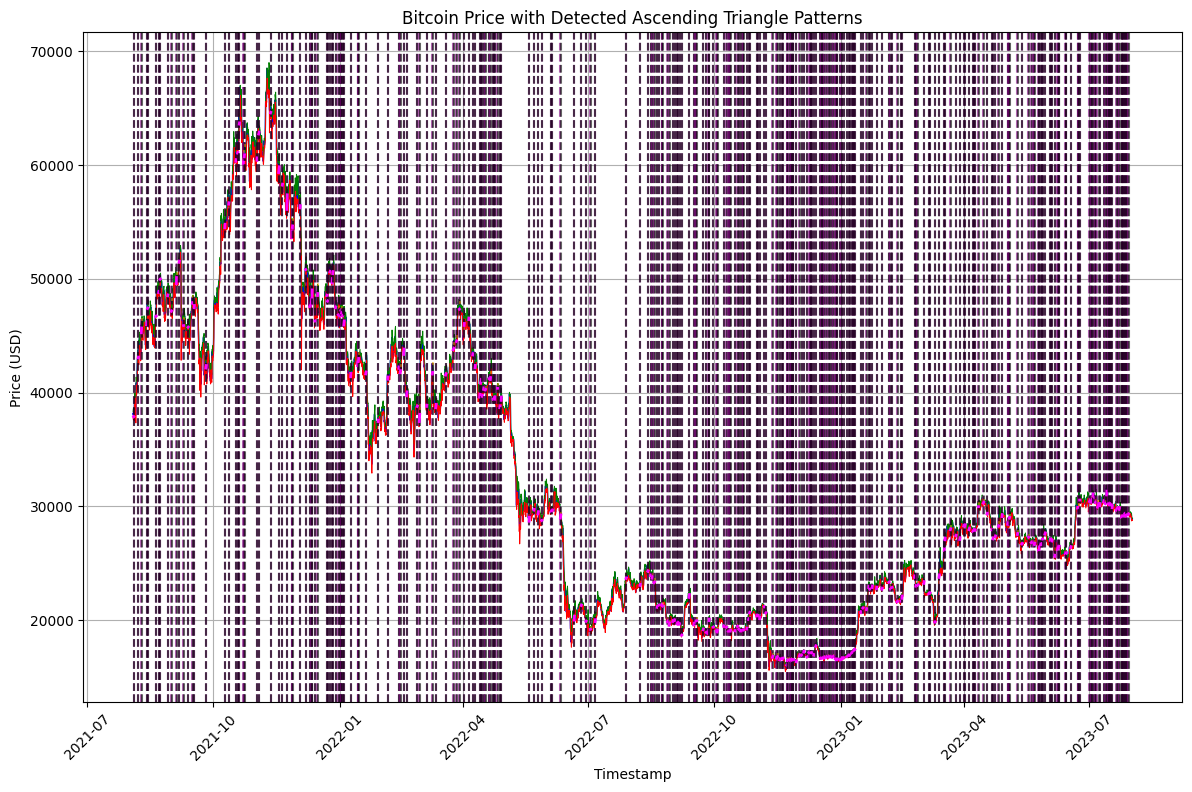

In [24]:
def plot_ascending_triangle(df_resampled1, patterns):
    plt.figure(figsize=(12, 8))
    
    # Plot the price data (high, low, close)
    plt.plot(df_resampled1.index, df_resampled1['close'], label='Close Price', color='blue', linewidth=1)
    plt.plot(df_resampled1.index, df_resampled1['high'], label='High Price', color='green', linewidth=0.7)
    plt.plot(df_resampled1.index, df_resampled1['low'], label='Low Price', color='red', linewidth=0.7)
    
    # Highlight detected patterns
    for pattern in patterns:
        start, end = pattern
        
        # Plot vertical lines for start and end of the pattern
        plt.axvline(x=start, color='purple', linestyle='--', alpha=0.6)
        plt.axvline(x=end, color='black', linestyle='--', alpha=0.6)

        # Convert the start and end timestamps to positional indices
        start_idx = df_resampled1.index.get_loc(start)
        end_idx = df_resampled1.index.get_loc(end)

        # Draw trendlines
        # Upper flat trendline (resistance)
        plt.hlines(df_resampled1.loc[start:end, 'high'].max(), xmin=start, xmax=end, colors='orange', label='Upper Resistance', linewidth=2)
        
        # Ascending trendline (support)
        plt.plot(df_resampled1.loc[start:end].index, np.linspace(df_resampled1.loc[start, 'low'], df_resampled1.loc[end, 'low'], end_idx - start_idx + 1), 
                 color='magenta', linewidth=2, label='Ascending Support')

    plt.title('Bitcoin Price with Detected Ascending Triangle Patterns')
    plt.xlabel('Timestamp')
    plt.ylabel('Price (USD)')
    plt.xticks(rotation=45)
    plt.grid()
    plt.tight_layout(pad=1.0)  # Adjust padding if necessary
    plt.show()

# Plot the Ascending Triangle patterns
plot_ascending_triangle(df_resampled1, patterns)

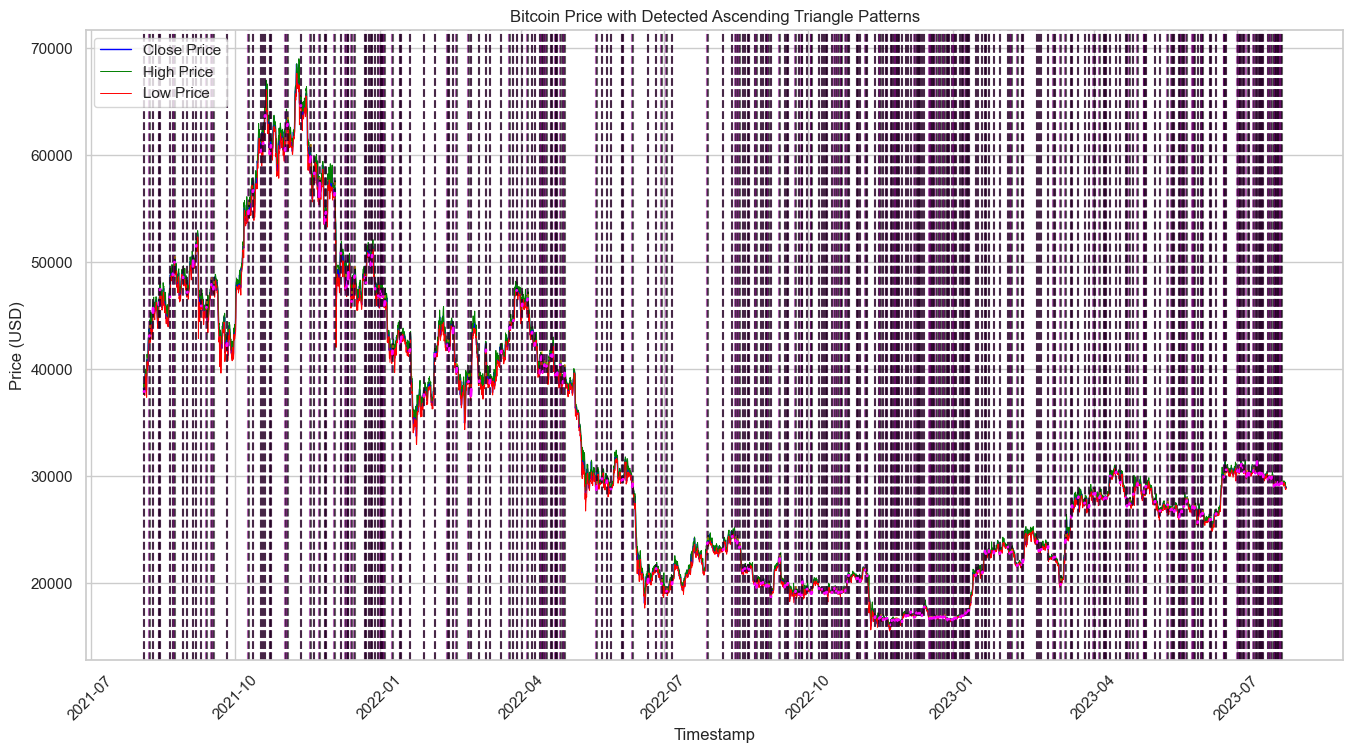

In [60]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns  # Import Seaborn

def plot_ascending_triangle(df_resampled1, patterns):
    plt.figure(figsize=(14, 8))

    # Set the seaborn style for better aesthetics
    sns.set(style="whitegrid")

    # Plot the price data (high, low, close) using Seaborn
    sns.lineplot(data=df_resampled1, x=df_resampled1.index, y='close', label='Close Price', color='blue', linewidth=1)
    sns.lineplot(data=df_resampled1, x=df_resampled1.index, y='high', label='High Price', color='green', linewidth=0.7)
    sns.lineplot(data=df_resampled1, x=df_resampled1.index, y='low', label='Low Price', color='red', linewidth=0.7)
    
    # Highlight detected patterns
    for pattern in patterns:
        start, end = pattern
        
        # Plot vertical lines for start and end of the pattern
        plt.axvline(x=start, color='purple', linestyle='--', alpha=0.6)
        plt.axvline(x=end, color='black', linestyle='--', alpha=0.6)

        # Convert the start and end timestamps to positional indices
        start_idx = df_resampled1.index.get_loc(start)
        end_idx = df_resampled1.index.get_loc(end)

        # Draw trendlines
        # Upper flat trendline (resistance)
        plt.hlines(df_resampled1.loc[start:end, 'high'].max(), xmin=start, xmax=end, colors='orange', linewidth=2, label='Upper Resistance')
        
        # Ascending trendline (support)
        plt.plot(df_resampled1.loc[start:end].index, 
                 np.linspace(df_resampled1.loc[start, 'low'], df_resampled1.loc[end, 'low'], end_idx - start_idx + 1), 
                 color='magenta', linewidth=2, label='Ascending Support')

    plt.title('Bitcoin Price with Detected Ascending Triangle Patterns')
    plt.xlabel('Timestamp')
    plt.ylabel('Price (USD)')
    plt.xticks(rotation=45)
    plt.tight_layout(pad=2.0)  # Adjust padding if necessary
    plt.show()

# Plot the Ascending Triangle patterns
plot_ascending_triangle(df_resampled1, patterns)

## Evaluation metrics for detection pattern using backtesting method

### Calculation for initial balance

In [50]:
# df_resampled1['close'].median() - calculates the median closing price of Bitcoin from the df_resampled1 DataFrame and stores it in the variable median_price.
# btc_amount = 10 - Defining the Position Size
# initial_balance = median_price * btc_amount- calculates the initial balance by multiplying the median price by the amount of Bitcoin (10 BTC) and stores the result in initial_balance.
# prining the results

In [31]:
# Calculate the median or average price in the dataset
median_price = df_resampled1['close'].median()

# Define the position size (e.g., 10 BTC)
btc_amount = 10  # Amount of Bitcoin

# Calculate the initial balance
initial_balance = median_price * btc_amount

print(f"Initial balance based on trading {btc_amount} BTC: ${initial_balance:.2f}")

Initial balance based on trading 10 BTC: $290083.50


In [52]:
# *** Back testing Method for evaluation ***

# Backtesting is a method used in finance and trading to evaluate the effectiveness of a trading strategy or model by applying it to historical data.
# The primary goal is to determine how well the strategy would have performed in the past, which can help traders and analysts make informed decisions about its potential future performance

# *** Performance metrics in Back testing method**

# 1.Total return: Overall profit or loss from the trades.
# 2.Win rate: Percentage of profitable trades versus total trades.
# 3.Average return per trade: Average profit or loss for each trade.
# 4.Maximum drawdown: The largest peak-to-trough decline in portfolio value.
# 5.Sharpe ratio: A measure of risk-adjusted return.


# The provided code snippet simulates a backtesting strategy for trading based on detected price patterns. 
# It begins by setting initial parameters, including the starting capital (initial_balance), the amount to invest per trade (position_size), and the thresholds for stop-loss and take-profit percentages.
# A loop iterates through the detected patterns, determining the entry price at the end of each pattern and calculating stop-loss and take-profit prices.
# Moreover it simulates the trade over a defined holding period, checking each period for price movements that trigger either the stop-loss or take-profit conditions. If neither condition is met, the trade is exited at the end of the holding period.
# The profit or loss for each trade is calculated, updating the balance accordingly. 
# Finally, a summary of the trading performance is compiled, including total returns, the number of trades, win rate, average return per trade, and maximum drawdown, which are printed as output. This simulation allows for evaluating the effectiveness of the trading strategy based on historical data.

In [32]:
# Parameters for backtesting
initial_balance = 290083.50  # Starting capital
balance = initial_balance
position_size = 1000  # Amount to invest per trade
stop_loss_pct = 0.02  # 2% stop-loss
take_profit_pct = 0.05  # 5% take-profit
holding_period = 10  # Maximum holding period in periods
# Record of trades
trades = []

# Simulate trades based on detected patterns
for i, pattern in enumerate(patterns):
    start_time, end_time = pattern
    entry_idx = df_resampled1.index.get_loc(end_time)  # Enter at the end of the pattern
    if entry_idx + holding_period >= len(df_resampled1):
        # Not enough data for the holding period
        continue

    entry_price = df_resampled1['close'].iloc[entry_idx]
    stop_loss_price = entry_price * (1 - stop_loss_pct)
    take_profit_price = entry_price * (1 + take_profit_pct)

    # Simulate holding period
    exit_price = None
    for j in range(1, holding_period + 1):
        idx = entry_idx + j
        high = df_resampled1['high'].iloc[idx]
        low = df_resampled1['low'].iloc[idx]

        # Check for stop-loss
        if low <= stop_loss_price:
            exit_price = stop_loss_price
            exit_time = df_resampled1.index[idx]
            outcome = 'Stop Loss'
            break
        # Check for take-profit
        elif high >= take_profit_price:
            exit_price = take_profit_price
            exit_time = df_resampled1.index[idx]
            outcome = 'Take Profit'
            break
    else:
        # Exit at the end of holding period
        exit_price = df_resampled1['close'].iloc[entry_idx + holding_period]
        exit_time = df_resampled1.index[entry_idx + holding_period]
        outcome = 'Holding Period End'

    # Calculate profit/loss
    pnl = (exit_price - entry_price) * (position_size / entry_price)
    balance += pnl

    # Record the trade
    trades.append({
        'Pattern Number': i + 1,
        'Entry Time': df_resampled1.index[entry_idx],
        'Exit Time': exit_time,
        'Entry Price': entry_price,
        'Exit Price': exit_price,
        'P&L': pnl,
        'Outcome': outcome
    })

# Create a DataFrame of trades
trades_df = pd.DataFrame(trades)

# Performance Metrics
total_return = trades_df['P&L'].sum()
num_trades = len(trades_df)
num_wins = len(trades_df[trades_df['P&L'] > 0])
num_losses = len(trades_df[trades_df['P&L'] <= 0])
win_rate = num_wins / num_trades if num_trades > 0 else 0
average_return = trades_df['P&L'].mean()
max_drawdown = trades_df['P&L'].min()

# Output results
print(f"Initial Balance: ${initial_balance:.2f}")
print(f"Final Balance: ${balance:.2f}")
print(f"Total Return: ${total_return:.2f}")
print(f"Number of Trades: {num_trades}")
print(f"Win Rate: {win_rate * 100:.2f}%")
print(f"Average Return per Trade: ${average_return:.2f}")
print(f"Maximum Drawdown: ${max_drawdown:.2f}")

Initial Balance: $290083.50
Final Balance: $289673.64
Total Return: $-409.86
Number of Trades: 291
Win Rate: 35.40%
Average Return per Trade: $-1.41
Maximum Drawdown: $-20.00
